
[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


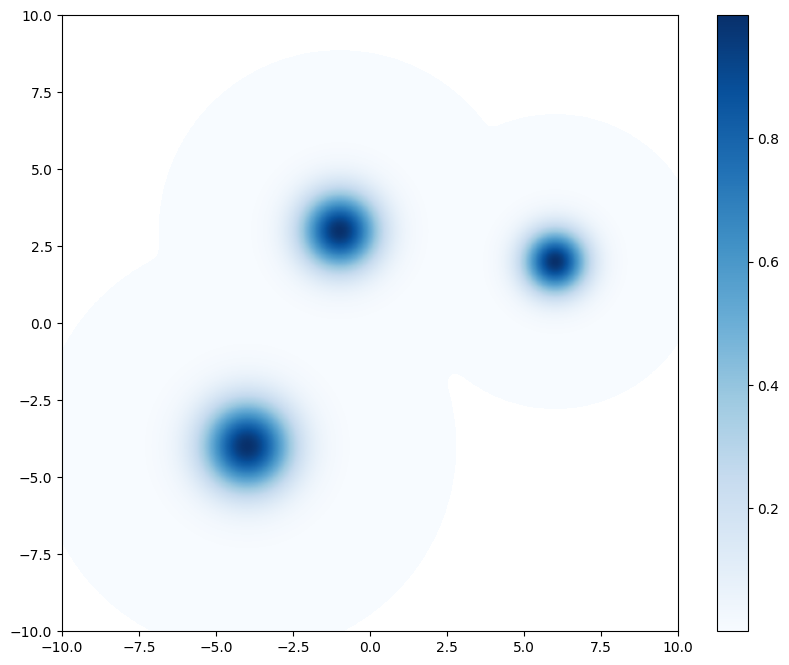

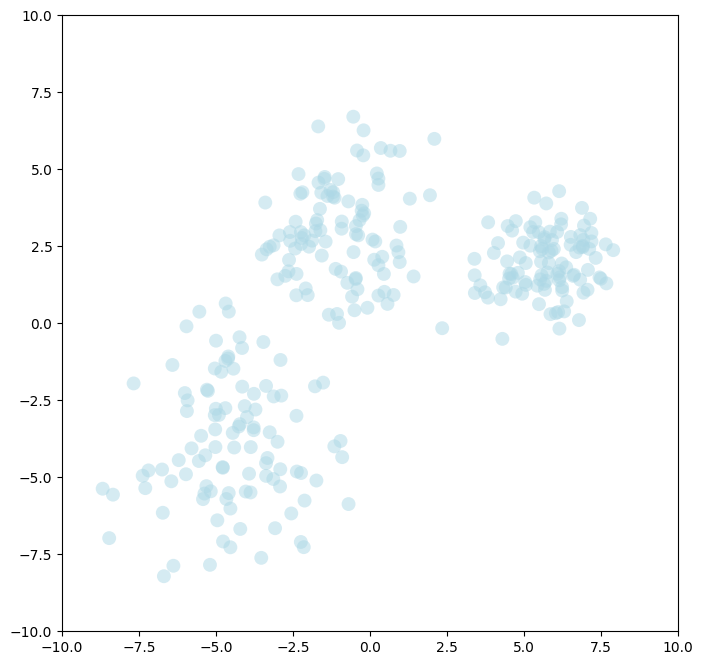

In [27]:
# 必要なライブラリのインストールとインポート
!pip install numpy matplotlib seaborn ipynbname scipy

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import ipynbname
from scipy.stats import norm
import sys

# ノートブックファイル名を取得する関数
def get_notebook_name():
    try:
        notebook_path = ipynbname.path()
        notebook_name = notebook_path.stem
    except FileNotFoundError:
        # Jupyter Notebook環境以外では__file__を使用
        notebook_name = Path(sys.argv[0]).stem if '__file__' not in globals() else Path(__file__).stem
    return notebook_name

# 現在のファイル名を取得
notebook_filename = get_notebook_name()

# 出力ディレクトリを設定
output_dir = Path(f'figures/{notebook_filename}')
output_dir.mkdir(parents=True, exist_ok=True)

# カラーパレットを辞書形式で定義
color_palette = {
    "White": "#FFFFFF",
    "Light Gray": "#D3D3D3",
    "Gray": "#808080",
    "Black": "#000000",
    "Green": "#008000",
    "Blue": "#0000FF",
    "Light Blue": "#ADD8E6",
    "Light Light Blue": "#E0FFFF",
    "Yellow": "#FFFF00",
    "Orange": "#FFA500",
    "Dark Orange": "#FF8C00",
    "Purple": "#800080"
}

# Light Blueを取得
light_blue_color = color_palette["Light Blue"]
white_color = color_palette["White"]

class TriModalDistribution:
    def __init__(self):
        pass

    def true_distribution(self, x, y):
        return (
            np.exp(-((x - 6)**2 + (y - 2)**2) / 1.0) +  # 右側の峰をさらに離す
            np.exp(-((x + 1)**2 + (y - 3)**2) / 1.5) +
            np.exp(-((x + 4)**2 + (y + 4)**2) / 2.0)   # 左上の峰をさらに強調
        )

    def sample(self, num_samples=300):
        samples_x = norm.rvs(loc=6, scale=1.0, size=num_samples // 3)  # (6, 2)
        samples_y = norm.rvs(loc=2, scale=1.0, size=num_samples // 3)

        samples_x = np.concatenate((samples_x, norm.rvs(loc=-1, scale=1.5, size=num_samples // 3)))  # (-1, 3)
        samples_y = np.concatenate((samples_y, norm.rvs(loc=3, scale=1.5, size=num_samples // 3)))

        samples_x = np.concatenate((samples_x, norm.rvs(loc=-4, scale=2.0, size=num_samples // 3)))  # (-4, -4)
        samples_y = np.concatenate((samples_y, norm.rvs(loc=-4, scale=2.0, size=num_samples // 3)))

        return samples_x, samples_y

# インスタンスを作成
distribution = TriModalDistribution()

# グリッドを作成
x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)
X, Y = np.meshgrid(x, y)
Z = distribution.true_distribution(X, Y)

# カラーマップを設定（0における色を白に設定）
cmap = plt.get_cmap('Blues')
cmap.set_under(color=white_color)

# ヒートマップを描画（等高線を削除）
plt.figure(figsize=(10, 8))
plt.imshow(Z, extent=(-10, 10, -10, 10), origin='lower', cmap=cmap, vmin=1e-10)
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.savefig(output_dir / 'true_distribution_heatmap.png', bbox_inches='tight', pad_inches=0)
plt.show()

# IIDサンプルの生成
samples_x, samples_y = distribution.sample(num_samples=300)  # サンプル数を減らす

# 散布図を描画
plt.figure(figsize=(10, 8))
plt.scatter(samples_x, samples_y, color=light_blue_color, alpha=0.5, s=100, edgecolors='none')  # データ点を大きくし、外枠なし
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.savefig(output_dir / 'empirical_distribution_scatter.png', bbox_inches='tight', pad_inches=0)
plt.show()